SHAP - Test

In [1]:
from tensorflow.keras.models import load_model
import shap
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

import pandas as pd

model = load_model("..\\..\\models\\combined_cnn1_bs256_k7_noweights.keras",
                                compile=False)
df = pd.read_pickle("..\\..\\data\\.MIT_Heartbeat_original_fs180hz.pkl")

class_labels = {"N": 0,
                "S": 1,
                "V": 2,
                "F": 3,
                "Q": 4}
record_length = 315
X_l2 = df.iloc[:, 6:6+record_length]
X_v5 = df.iloc[:, 6+record_length:]
X_l2v5 = df.iloc[:, 6:]
X = X_l2
y = df["class"].replace(class_labels)

# X = digital_filter_preprocess(X)
# X = substract_mean(X, n=3)
# X, y = delete_rows_of_class_n(X, y, p=0.5, label=0)
#X = preprocess_fft(X)

X_train_l2, X_test_l2, y_train_labels, y_test_labels = train_test_split(X_l2, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train_v5, X_test_v5, y_train_labels, y_test_labels = train_test_split(X_v5, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train_l2v5, X_test_l2v5, y_train_labels, y_test_labels = train_test_split(X_l2v5, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

# One-Hot-Encoding
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

C:\Users\felix\AppData\Local\Temp\ipykernel_41800\1370714443.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df["class"].replace(class_labels)


In [2]:
# X = (np.array(X_test_l2), np.array(X_test_v5))
X1 = np.array(X_test_l2)
X2 = np.array(X_test_v5)

X_test = np.concatenate((X1, X2), axis=1)
# random_indices = np.random.choice(X_test.shape[0], size=256, replace=False)
# X_test = X_test[random_indices]
X_test = shap.sample(X_test, 512, random_state=42)
X_test = X_test[384:512, :]



def model_wrapper(X_test):
    Xa = X_test[:, :315]
    Xb = X_test[:, 315:]
    return model.predict([Xa, Xb])

explainer = shap.KernelExplainer(model_wrapper, X_test)

shap_values = explainer.shap_values(X_test)

# # SHAP-Werte visualisieren
# shap.summary_plot(shap_values, X)

# # Einzelne Vorhersage visualisieren
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0], X[0])

4/4 [==============================] - 2s 2ms/step


Using 128 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/128 [00:00<?, ?it/s]

13232/13232 [==============================] - 24s 2ms/step


In [3]:
np.save("shapvalues_384_512", shap_values)
np.save("shap_explainer_384_512", explainer)

In [5]:
X1 = np.array(X_train_l2)
X2 = np.array(X_train_v5)

X_test = np.concatenate((X1, X2), axis=1)
# random_indices = np.random.choice(X_test.shape[0], size=256, replace=False)
# X_test = X_test[random_indices]
X_test = shap.sample(X_test, 512, random_state=42)



def model_wrapper(X_test):
    Xa = X_test[:, :315]
    Xb = X_test[:, 315:]
    return model.predict([Xa, Xb])

for i in [0, 128, 256, 384]:
    X_test_sample = X_test[i:i+128, :]

    explainer = shap.KernelExplainer(model_wrapper, X_test_sample)

    shap_values = explainer.shap_values(X_test_sample)
    np.save(f"shapvalues_{i}_{i+128}_train", shap_values)
    np.save(f"shap_explainer_{i}_{i+128}_train", explainer)


4/4 [==============================] - 0s 95ms/step


Using 128 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 117ms/step


Using 128 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 11ms/step


Using 128 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 61ms/step


Using 128 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/128 [00:00<?, ?it/s]

11840/11840 [==============================] - 23s 2ms/step


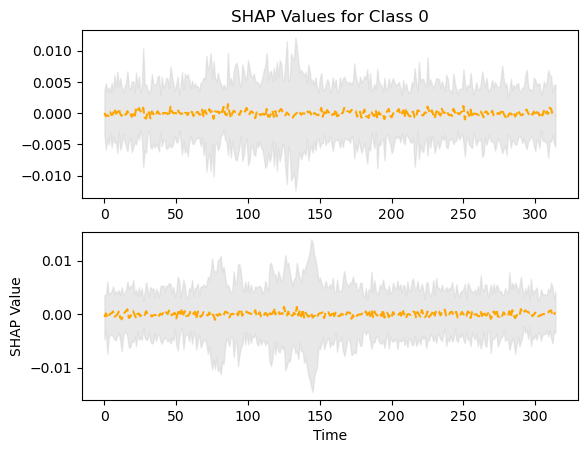

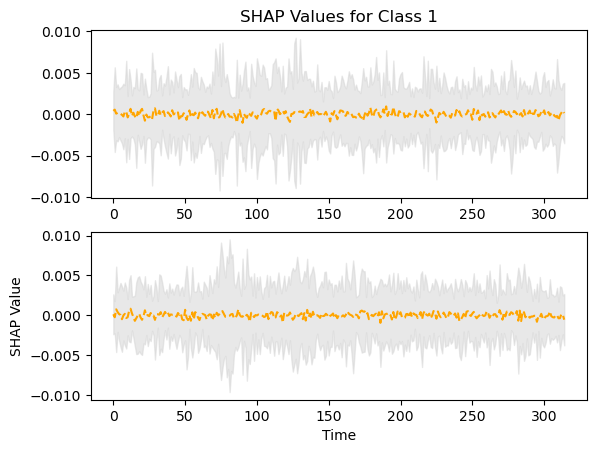

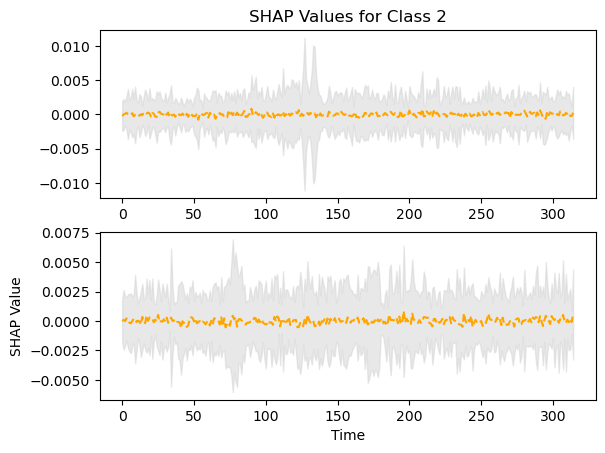

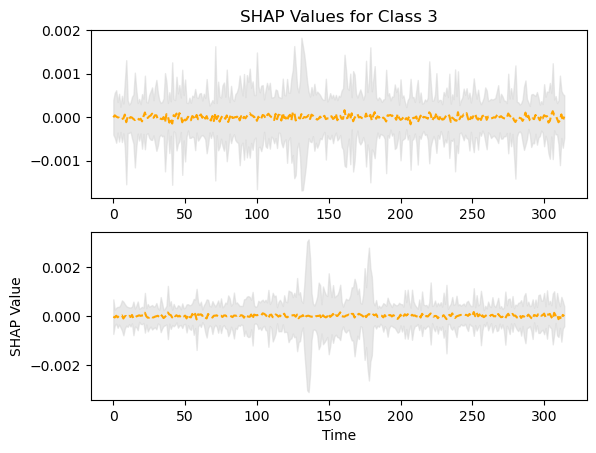

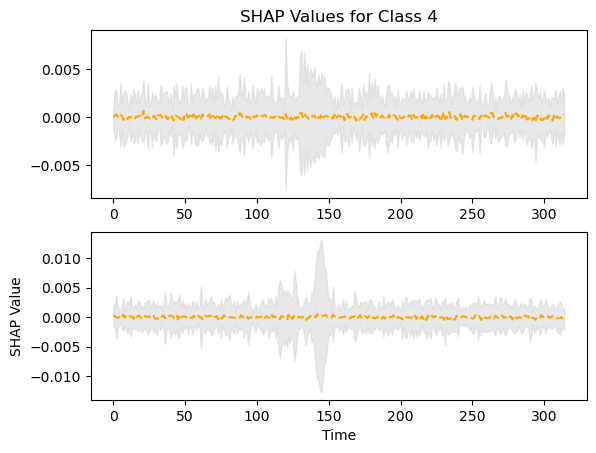

array([[[ 6.65515885e-04, -8.06239900e-04,  0.00000000e+00,
          0.00000000e+00, -1.54091530e-04],
        [-4.39622022e-04,  6.53445822e-05,  2.23936631e-04,
         -1.05880487e-04,  0.00000000e+00],
        [-2.66060301e-03,  1.45502754e-03,  1.00089851e-03,
          1.43268436e-04,  9.66955007e-04],
        ...,
        [ 0.00000000e+00,  0.00000000e+00, -3.41239135e-04,
          6.63608499e-05,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          2.74873646e-04,  0.00000000e+00],
        [-9.27743496e-04,  6.28862837e-04,  0.00000000e+00,
         -1.00847882e-04,  5.65533557e-04]],

       [[ 0.00000000e+00,  8.73924188e-03, -6.74341228e-04,
         -5.27167004e-05, -2.25216802e-04],
        [ 8.91955983e-03, -1.35653229e-02,  0.00000000e+00,
          0.00000000e+00, -4.71834000e-04],
        [ 0.00000000e+00,  0.00000000e+00,  3.66887161e-04,
         -5.50783462e-05,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.0000000

In [8]:
import matplotlib.pyplot as plt
for i in range(0, 5):
    fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)
    mean_values = np.mean(shap_values, axis=0)

    std_upper = mean_values + np.std(shap_values, axis=0)
    std_lower = mean_values - np.std(shap_values, axis=0)
    x = np.arange(0, 315)
    ax1.plot(x, mean_values[0:315, i], label='Mittelwert', color='orange', linestyle='--')
    ax1.fill_between(x, std_lower[0:315, i], std_upper[0:315, i], color='lightgray', alpha=0.5, label='±1 Standardabweichung')

    ax2.plot(x, mean_values[315:, i], label='Mittelwert', color='orange', linestyle='--')
    ax2.fill_between(x, std_lower[315:, i], std_upper[315:, i], color='lightgray', alpha=0.5, label='±1 Standardabweichung')


    # ax1.plot(shap_values[:, :315, i].T)  # Beispiel: SHAP-Werte für die erste Klasse
    # ax2.plot(shap_values[:, 315:, i].T)  # Beispiel: SHAP-Werte für die erste Klasse


    ax1.set_title('SHAP Values for Class ' + str(i))
    plt.xlabel('Time')
    plt.ylabel('SHAP Value')
    plt.show()
shap_values


In [17]:
# Test this!
# shap.decision_plot(explainer.expected_value, shap_values[i,:,:], X_test[i, :])
# explainer.expected_value
np.save("shap_explainer_128_256", explainer)

In [43]:
(std_upper[0:315,i]+std_lower[0:315,i][::-1]).shape

(315,)

In [ ]:










fig.add_trace(go.Scatter(x=time, y=mean_values[:315,i], mode='lines', name='Time Series Data 1'), row=1, col=1)
fig.add_trace(go.Scatter(
        x=time+time[::-1], # x, then x reversed
        y=std_upper[0:315,i]+std_lower[0:315,i][::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(200,100,200,0.2)',
        line=dict(color='rgba(5,255,4,100)'),
        # hoverinfo="skip",
        showlegend=True
    ))
fig.show()
# fig.add_trace(go.Scatter(x=time, y=[std_upper[:315,i]]*len(time), mode='lines', name='Upper Bound', line=dict(dash='dash', color='gray')), row=1, col=1)
# fig.add_trace(go.Scatter(x=time, y=[std_lower[:315,i]]*len(time), mode='lines', name='Lower Bound', line=dict(dash='dash', color='gray')), row=1, col=1)

# fig.add_traces(go.Scatter(x=x+x[::-1],
#                                 y=std_upper+std_lower,
#                                 fill='tozerox',
#                                 fillcolor=new_col,
#                                 line=dict(color='rgba(255,255,255,0)'),
#                                 showlegend=False,
#                                 name=col))
